In [1]:
!pip install ISLP -q
!pip install great_tables
!pip install graphviz
!pip install dowhy

In [2]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import networkx as nx
from great_tables import GT as GT
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
from linearmodels import PanelOLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import ModelSpec as MS
from functools import partial

from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import graphviz
COLORS = [
    '#00B0F0',
    '#FF0000'
]

df = pd.read_stata('./replication_sample.dta')
df_main = df[df['main_sample']==1]

df_main.columns
print(df_main.columns)

Index(['year', 'newhclust', 'HHI_bar', 'HHI_hat', 'r_hat', 'num_words',
       'num_char', 'long_tail', 'branded', 'numind', 'numberofresults',
       'logr_bar', 'logr_hat', 'diffr_hat', 'logcpc', 'logvol', 'lognum',
       'sim', 'cluster', 'constant', 'evermerged', 'timetoswitch',
       'allP_sample', 'main_sample', 'ind_sample', 'own_branded',
       'other_branded', 'negative_HHIchange', 'shiftmerge', 'sapientmerge',
       'merklemerge', 'forsmanmerge'],
      dtype='object')


In [3]:
design = MS(df_main[['year','newhclust','HHI_hat','num_words','num_char','long_tail','branded','numind','numberofresults','logcpc', 'logvol', 'lognum', 'cluster']])
Y = np.array(df_main['logr_hat'])
R = design.fit_transform(df_main)
D = R.drop('intercept', axis=1)
X = np.asarray(D)

Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]

print(D)
print(X)


        year  newhclust   HHI_hat  num_words   num_char  long_tail   branded  \
61      2015     100302  0.250000   1.666667  12.666667   0.000000  0.000000   
62      2016     100302  0.250000   1.714286  10.142858   0.142857  0.000000   
63      2017     100302  0.500016   1.500000   9.000000   0.000000  0.000000   
66      2016     100303  1.000000   1.800000  13.000000   0.000000  0.000000   
69      2015     100304  1.000000   2.200000  14.000000   0.000000  0.200000   
...      ...        ...       ...        ...        ...        ...       ...   
221399  2016    2299907  0.186252   5.000000  31.000000   1.000000  0.000000   
221402  2016    2299908  0.169746   4.000000  22.000000   1.000000  0.346154   
221403  2017    2299908  0.075408   4.000000  22.000000   1.000000  0.000000   
221406  2016    2299909  0.180000   3.000000  18.000000   0.000000  0.000000   
221411  2017    2299910  0.200000   6.000000  36.000000   1.000000  0.000000   

        numind  numberofresults    logc

In [4]:
# Define the graph
gml1 = """graph [
directed 1

node [
    id 0
    label "HHI"
    ]

node [
    id 1
    label "log(Revenue)"
    ]

node [
    id 2
    label "Keyword Char."
    ]
    
node [
    id 3
    label "M&A"
    ]
    
edge [
    source 0
    target 1
    ]

edge [
    source 2
    target 0
    ]

edge [
    source 2
    target 1
    ]

edge [
    source 3
    target 0
    ]

]
    
    """

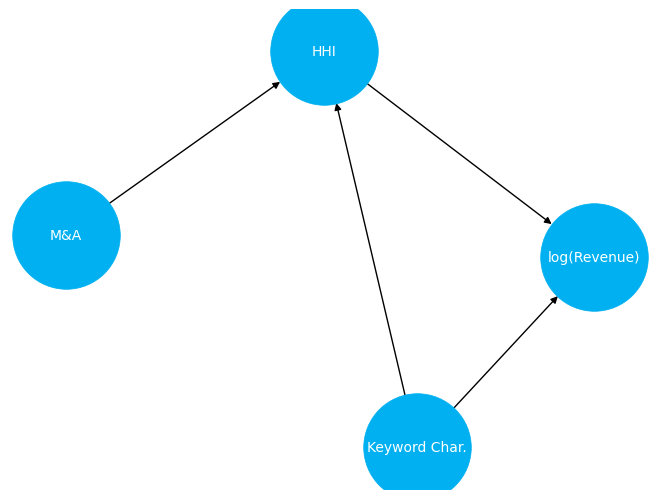

In [5]:
# Get the graph
graph = nx.parse_gml(gml1)

# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=6000,
    node_color=COLORS[0],
    font_size=10,
    font_color='white'
)

In [23]:
# Define the graph
gml2 = """graph [
directed 1

node [
    id 0
    label "HHI"
    ]

node [
    id 1
    label "log(Revenue)"
    ]

node [
    id 2
    label "Keyword Char."
    ]
    
node [
    id 3
    label "M&A"
    ]

node [
    id 4
    label "Cluster & Year"
    ]
    
edge [
    source 0
    target 1
    ]

edge [
    source 2
    target 0
    ]

edge [
    source 2
    target 1
    ]

edge [
    source 3
    target 0
    ]

edge [
    source 4
    target 0
    ]

edge [
    source 4
    target 1
    ]

edge [
    source 4
    target 2
    ]

edge [
    source 4
    target 3
    ]

]
    
    """

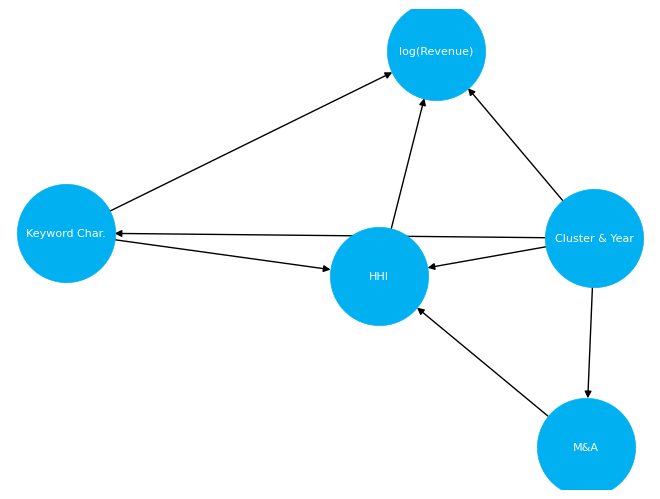

In [37]:
# Get the graph
graph = nx.parse_gml(gml2)

# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=5000,
    node_color=COLORS[0],
    font_size=8,
    font_color='white'
)

In [8]:
# Define the graph
gml3 = """graph [
directed 1

node [
    id 0
    label "HHI"
    ]

node [
    id 1
    label "log(Revenue)"
    ]

node [
    id 2
    label "Keyword Char."
    ]
    
node [
    id 3
    label "M&A"
    ]

node [
    id 4
    label "Market & Year"
    ]
    
edge [
    source 0
    target 1
    ]

edge [
    source 1
    target 3
    ]

edge [
    source 2
    target 0
    ]

edge [
    source 2
    target 1
    ]

edge [
    source 3
    target 0
    ]

edge [
    source 4
    target 0
    ]

edge [
    source 4
    target 1
    ]

edge [
    source 4
    target 2
    ]

edge [
    source 4
    target 3
    ]

]
    
    """

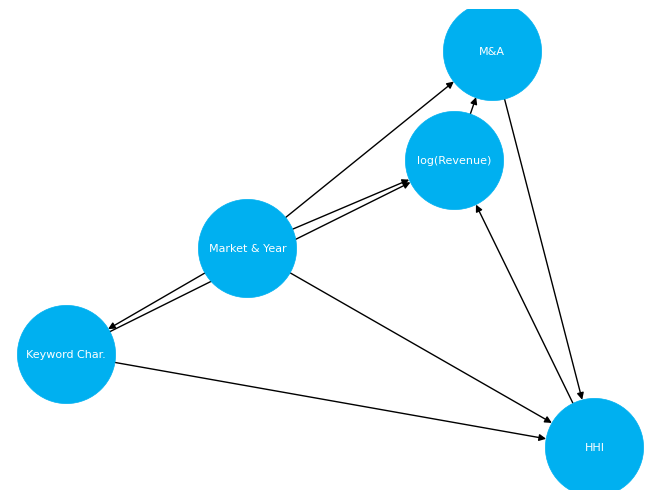

In [9]:
# Get the graph
graph = nx.parse_gml(gml3)

# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=5000,
    node_color=COLORS[0],
    font_size=8,
    font_color='white'
)

In [10]:
import dowhy

causal_graph = """digraph {
logr_hat; HHI_hat; KC; MY; sim;
HHI_hat -> logr_hat;
KC -> logr_hat;
KC -> HHI_hat;
MY -> logr_hat;
MY -> HHI_hat;
MY -> KC;
sim -> HHI_hat;
}"""

from PIL import Image
model.view_model(file_name='dag')
Image.open('dag.png')

model = dowhy.CausalModel(
            data=df_main,
            treatment='HHI_hat',
            outcome='logr_hat',
            graph=causal_graph)

estimand = model.identify_effect()
print(estimand)

NameError: name 'model' is not defined

In [ ]:
estimate = model.estimate_effect(identified_estimand=estimand, method_name='iv.instrumental_variable')

In [ ]:
print(estimate)

In [ ]:
refute_subset = model.refute_estimate(
estimand=estimand,
estimate=estimate,
method_name="data_subset_refuter",
subset_fraction=0.95)

print(refute_subset)